In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import cut

In [64]:
shopping_df = pd.read_csv('data/shopping_behavior_updated.csv')

season_order = ['Spring', 'Summer', 'Fall', 'Winter']

shopping_df.head()

shopping_df.info()

shopping_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


0       50~64
1       18~34
2       50~64
3       18~34
4       35~49
        ...  
3895    35~49
3896    50~64
3897    35~49
3898    35~49
3899    50~64
Name: Age_cut, Length: 3900, dtype: category
Categories (4, object): ['18~34' < '35~49' < '50~64' < '65~']


C:\Users\TJ\AppData\Local\Temp\ipykernel_688\2872183178.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shopping_df.groupby(['Age_cut', 'Category'])
C:\Users\TJ\AppData\Local\Temp\ipykernel_688\2872183178.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shopping_df.groupby(['Age_cut', 'Color'])
C:\Users\TJ\AppData\Local\Temp\ipykernel_688\2872183178.py:51: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shopping_d

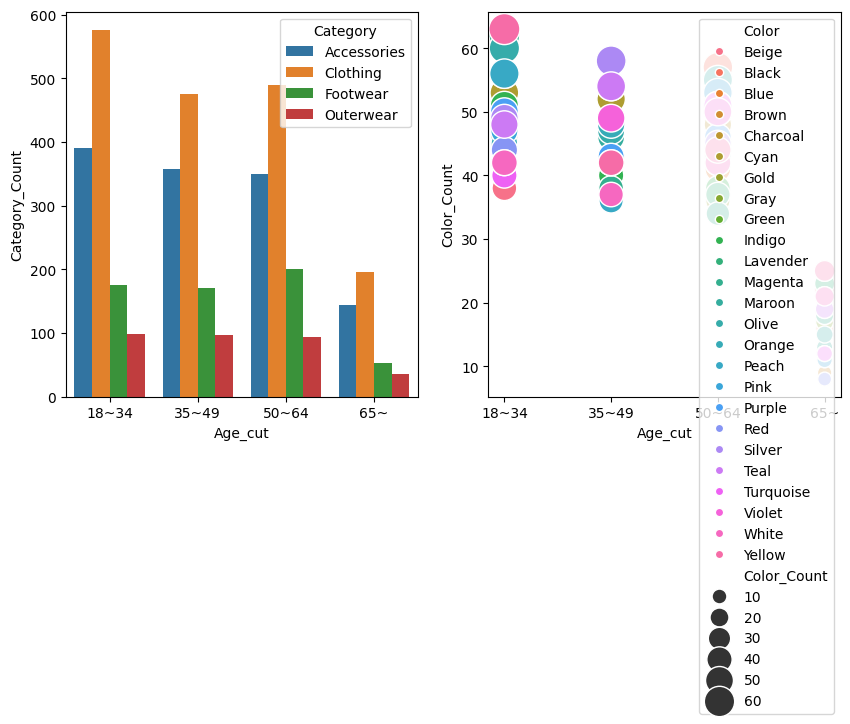

,Age_cut,Color,Color_Count
0,18~34,Beige,38
1,18~34,Black,51
2,18~34,Blue,49
3,18~34,Brown,48
4,18~34,Charcoal,49
...,...,...,...
95,65~,Teal,19
96,65~,Turquoise,12
97,65~,Violet,25
98,65~,White,21


In [78]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))




max_age =shopping_df['Age'].max()

shopping_df['Age_cut'] = pd.cut(shopping_df['Age'],
                                bins = [17, 34, 49, 64, max_age],
                                labels= ['18~34', '35~49', '50~64', '65~'])


# 커스텀 팔레트
custom_palette = {
    'Spring' : 'yellow',
    'Summer' : 'green',
    'Fall'   : 'orange',
    'Winter' : 'blue'
    
}


# a = shopping_df[shopping_df['Age'] == 6].count()

#shopping_df['Category_Count'] = 

#print(shopping_df['Age_cut'])

print(shopping_df['Age_cut'])

#shopping_df['Category_Count'] = shopping_df['Category'].value_counts()

#print(shopping_df['Category_Count'])

#age_category_count_df = shopping_df.groupby(['Age_cut', 'Category']).size().reset_index(name='Category_Count')

age_category_df = (
    shopping_df.groupby(['Age_cut', 'Category'])
    .size()
    .reset_index(name='Category_Count')
)
# .size()는 각 그룹의 “행 개수(row count)”를 반환합니다.

age_color_df = (
    shopping_df.groupby(['Age_cut', 'Color'])
    .size()
    .reset_index(name='Color_Count')
)

age_color_gender_df = (
    shopping_df.groupby(['Age_cut', 'Color', 'Gender'])
    .size()
    .reset_index(name='Color_Count')
)

age_color_gender_season_df = (
    shopping_df.groupby(['Age_cut', 'Color', 'Gender', 'Season'])
    .size()
    .reset_index(name='Color_Count')
)

winter_df = age_color_gender_season_df[(age_color_gender_season_df['Season'] == 'Winter')
                                        & (age_color_gender_season_df['Age_cut'] == '18~34')].dropna(subset=['Age_cut','Color', 'Gender', 'Color_Count' ])




#print(age_color_gender_df)

#print(age_color_df)


#print(age_category_df)

#print(winter_df)




sns.barplot(data=age_category_df, x='Age_cut', y='Category_Count', hue='Category', ax=ax[0])

sns.scatterplot(data=age_color_df, x='Age_cut', y='Color_Count', hue='Color',
                ax=ax[1], size='Color_Count', sizes=(100, 500))




plt.show()

#winter_df.head()

age_color_df



<Figure size 3500x1500 with 0 Axes>

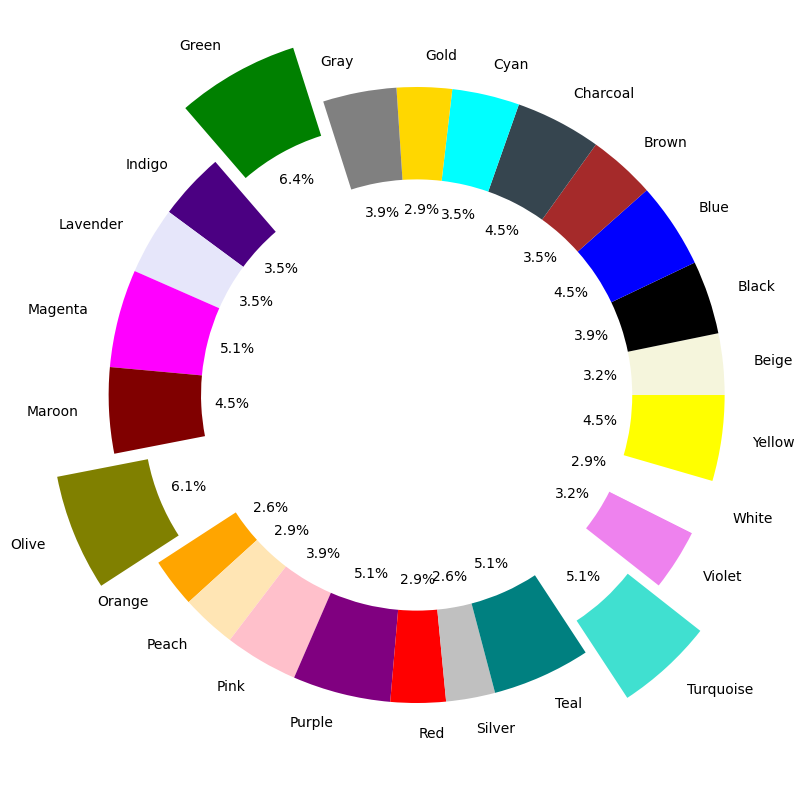

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.2,
 0,
 0,
 0,
 0,
 0.2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.2,
 0,
 0,
 0]

In [125]:
plt.figure(figsize=(35, 15))

age18_spring_df = age_color_gender_season_df[(age_color_gender_season_df['Age_cut'] == '18~34') &
                                        (age_color_gender_season_df['Season'] == 'Spring')].dropna(subset=['Season', 'Color', 'Gender', 'Color_Count'])

age18_spring_df['Season'] = pd.Categorical(age18_spring_df['Season'], categories=season_order, ordered=True)

values = age18_spring_df['Color_Count']
labels = age18_spring_df['Color']

color_sum = age18_spring_df.groupby('Color')['Color_Count'].sum()


# 커스텀 팔레트
custom_palette = {
    'Spring' : 'yellow',
    'Summer' : '#3cc255',
    'Fall'   : '#ff7300',
    'Winter' : '#1383eb'
    
}


custom_color_palette = {
    
    'Beige'     :   '#F5F5DC',
    'Black'     :   'Black',
    'Blue'      :   'Blue',
    'Brown'     :   '#A52A2A',
    'Charcoal'  :   '#36454F',
    'Cyan'      :   'Cyan',
    'Gold'      :   'Gold',
    'Gray'      :   'Gray',
    'Green'     :   'Green',
    'Indigo'    :   '#4B0082',
    'Lavender'  :   '#E6E6FA',
    'Magenta'   :   'Magenta',
    'Maroon'    :   '#800000',
    'Olive'     :   'Olive',
    'Orange'    :   'Orange',
    'Peach'     :   '#FFE5B4',
    'Pink'      :   'Pink',
    'Purple'    :   'Purple',
    'Red'       :   'Red',
    'Silver'    :   '#C0C0C0',
    'Teal'      :   'Teal',
    'Turquoise' :   '#40E0D0',
    'Violet'    :   'Violet',
    'White'     :   'White',
    'Yellow'    :   'Yellow'
        
    
    
}

# Pie 차트용 colors 리스트 생성
colors = [custom_color_palette[color] for color in color_sum.index]

# k : v 대신 list 형태로 만드는 게 더 간단함.  색상 개수는 color_sum.index 개수와 맞춰야 함
#colors = ['#FFD700', '#000000', '#1E90FF', '#A52A2A', '#808080', '#FF69B4', '#00FF00', '#FF4500', '#8A2BE2', '#FFFFFF']


plt.figure(figsize=(10, 10))


# wedges, texts = plt.pie(
#     color_sum.values,
#     labels=color_sum.index,
#     colors=colors,
#     startangle=90,
#     wedgeprops={'width': 0.4}  # 도넛 모양
# )

# total = color_sum.sum()

# # 숫자를 라벨 옆으로 배치
# for i, p in enumerate(wedges):
#     x, y = p.theta2/180*np.pi, p.theta2/180*np.pi  # 위치 계산 (간단 버전)
#     # 조금 더 정확하게 하려면 trigonometry 사용
#     angle = (p.theta2 + p.theta1)/2 * np.pi / 180  # 조각 중앙 각도
#     radius = 1.3  # 라벨 밖으로 나가도록
#     percent = color_sum.values[i] / total * 100
#     plt.text(
#         radius * np.cos(angle),
#         radius * np.sin(angle),
#         f"{percent:.1f}%",
#         ha='center',
#         va='center',
#         fontsize=12
#     )


# color_sum.values
# array([10, 12, 14, 11, 14, 11,  9, 12, 20, 11, 11, 16, 14, 19,  8,  9, 12,
#        16,  9,  8, 16, 16, 10,  9, 14]) -> color_sum.values 이미 리스트임.
# -> <class 'numpy.ndarray'>


# 상위 3개 색깔 바깥으로 빼기
# argsort : 배열을 오름차순으로 정렬했을 때, 원래 배열에서 위치(인덱스)를 반환
top3_idx = np.argsort(color_sum.values)[-3:]

top3_values = color_sum.values[top3_idx]

top3_percent = top3_values/color_sum.sum() * 100

# explode → 조각마다 얼마나 밖으로 튀어나오게 할지 지정
# explode는 리스트 형태로 넣습니다.
# 
explode = [0.2 if i in top3_idx else 0 for i in range(len(color_sum.values))]



# 1️⃣ 기본 배열
# import numpy as np

# arr = np.array([50, 10, 30, 20])


# 배열은 이렇게 생겼어요:

# arr = [50, 10, 30, 20]

# 2️⃣ np.argsort() 적용
# idx = np.argsort(arr)
# print(idx)


# 출력:

# [1 3 2 0]


# 해석:

# 1 → 값 10 → 가장 작음

# 3 → 값 20 → 두 번째

# 2 → 값 30 → 세 번째

# 0 → 값 50 → 가장 큼

# 즉, argsort는 **원래 배열에서 오름차순으로 정렬된 위치(인덱스)**를 반환합니다.





# color_sum.values, labels=color_sum.index -> 인덱스 길이 일치시켜줘야 함!
plt.pie(color_sum.values, labels=color_sum.index, autopct='%1.1f%%', colors=colors,
        wedgeprops={'width' : 0.3}, explode=explode)


# sns.barplot(data=age18_spring_df, x='Color', y='Color_Count', hue='Season', ci=None, palette=custom_palette,
#             hue_order=['Spring', 'Summer', 'Fall', 'Winter'])

# plt.title('Age - 18~34', fontsize=20)

# plt.xlabel('Color', fontsize=20)
# plt.ylabel('Color_Count', fontsize=20)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)


# # ✅ 범례 순서 변경
# handles, labels = plt.gca().get_legend_handles_labels()

# # 순서를 바꾸고 싶을 때
# order = ['Spring', 'Summer', 'Fall', 'Winter']

# # labels 리스트에서 order 순서에 맞게 재정렬 -> 질문 왜 인덱스를 o로 한 건지?
# ordered_handles = [handles[labels.index(o)] for o in order if o in labels]

# plt.legend(ordered_handles, order, title='Season', title_fontsize=22, fontsize=18)


plt.show()

top3_values

top3_percent


top3_values

top3_percent

explode


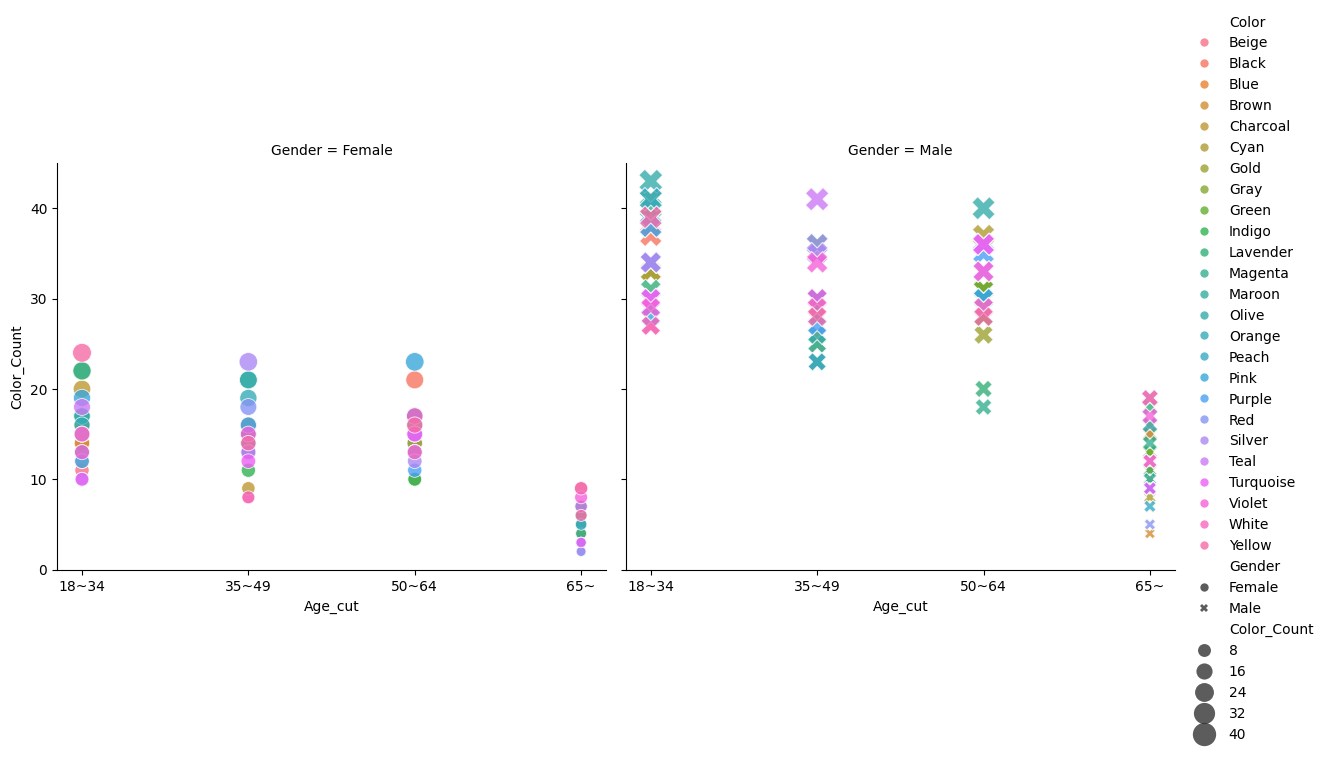

In [67]:
fig, ax = plt.subplots(1,2, figsize=(100, 100))


sns.scatterplot(data=age_color_gender_df, x='Age_cut', y='Color_Count', hue='Color',
                ax=ax[0], size='Color_Count', sizes=(100, 500), style='Gender', alpha=0.8)


sns.relplot(
    data=age_color_gender_df,
    x='Age_cut',
    y='Color_Count',
    hue='Color',
    size='Color_Count',
    sizes=(50, 300),
    style='Gender',
    alpha=0.8,
    col='Gender',    # 성별별로 나누기
    kind='scatter',
    height=5,
    aspect=1.2
)

plt.show()


ValueError: not enough values to unpack (expected 2, got 0)

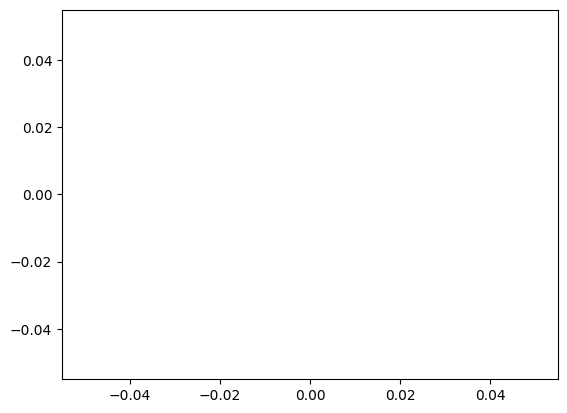

In [68]:
fig, ax = plt.plot(figsize=(100, 100))

sns.scatterplot(
    data=age_color_gender_season_df,
    x='Color_Count', y='Color', hue='Season',
    ax=ax[0]
)


sns.relplot(
    data=winter_df,
    x='Age_cut',
    y='Color_Count',
    hue='Color',
    col='Gender',
    height=5,
    aspect=1.2,
    size='Color_Count',
    sizes=(50, 300),
    kind='scatter',
    alpha=0.8

)



plt.show()
